Importing the Dataset into a dataframe named FINALDATA

In [97]:
import pandas as pd
FINALDATA=pd.read_excel(r"\\iafs1\data\sa\consultants\Customers File\Final_labeled_File.xlsx",sheet_name = "Sheet2")

Checking whether any null values exists in the dataset

In [3]:
FINALDATA.isnull().sum()

.of Mails                         0
Term                              0
LTL+Other Plan                    0
CERT_CL                           0
MEM_CODE                          0
I_CLASS                           0
I_SEX                             0
MODE                              0
ISSU_STATE                        0
RISK_CLASS                        0
md_do                             0
visa_code                         0
Current Member status             0
prim_spec                         0
prim_top                          0
prim_pe                           0
mpa_code                          0
ANNZD_PREM                        0
I_CURR_AGE                        0
I_AGE_ISSU                        0
Duration                          0
yrs_pract                         0
Total_years_of_membership         0
Continuous_years_of_membership    0
EFF_D                             0
CMP_D                             0
dtype: int64

In [4]:
FINALDATA.dtypes

.of Mails                         float64
Term                                int64
LTL+Other Plan                      int64
CERT_CL                             int64
MEM_CODE                            int64
I_CLASS                             int64
I_SEX                               int64
MODE                                int64
ISSU_STATE                          int64
RISK_CLASS                          int64
md_do                               int64
visa_code                           int64
Current Member status               int64
prim_spec                           int64
prim_top                            int64
prim_pe                             int64
mpa_code                            int64
ANNZD_PREM                          int64
I_CURR_AGE                          int64
I_AGE_ISSU                          int64
Duration                          float64
yrs_pract                         float64
Total_years_of_membership         float64
Continuous_years_of_membership    

Converting the dummy labelled categorical variables dtype="Category"

In [98]:
FINALDATA["Term"] = FINALDATA["Term"].astype("category")
FINALDATA["LTL+Other Plan"] = FINALDATA["LTL+Other Plan"].astype("category")
FINALDATA["CERT_CL"] = FINALDATA["CERT_CL"].astype("category")
FINALDATA["MEM_CODE"] = FINALDATA["MEM_CODE"].astype("category")
FINALDATA["I_CLASS"] = FINALDATA["I_CLASS"].astype("category")
FINALDATA["I_SEX"] = FINALDATA["I_SEX"].astype("category")
FINALDATA["MODE"] = FINALDATA["MODE"].astype("category")
FINALDATA["ISSU_STATE"] = FINALDATA["ISSU_STATE"].astype("category")
FINALDATA["md_do"] = FINALDATA["md_do"].astype("category")
FINALDATA["visa_code"] = FINALDATA["visa_code"].astype("category")
FINALDATA["Current Member status"] = FINALDATA["Current Member status"].astype("category")
FINALDATA["prim_spec"] = FINALDATA["prim_spec"].astype("category")
FINALDATA["prim_top"] = FINALDATA["prim_top"].astype("category")
FINALDATA["prim_pe"] = FINALDATA["prim_pe"].astype("category")
FINALDATA["mpa_code"] = FINALDATA["mpa_code"].astype("category")
FINALDATA["ANNZD_PREM"] = FINALDATA["ANNZD_PREM"].astype("category")
FINALDATA["RISK_CLASS"] = FINALDATA["RISK_CLASS"].astype("category")
FINALDATA["I_CURR_AGE"] = FINALDATA["I_CURR_AGE"].astype("category")
FINALDATA["I_AGE_ISSU"] = FINALDATA["I_AGE_ISSU"].astype("category")


Checking the datatypes of FINALDATA

In [6]:
FINALDATA.dtypes

.of Mails                          float64
Term                              category
LTL+Other Plan                    category
CERT_CL                           category
MEM_CODE                          category
I_CLASS                           category
I_SEX                             category
MODE                              category
ISSU_STATE                        category
RISK_CLASS                        category
md_do                             category
visa_code                         category
Current Member status             category
prim_spec                         category
prim_top                          category
prim_pe                           category
mpa_code                          category
ANNZD_PREM                        category
I_CURR_AGE                        category
I_AGE_ISSU                        category
Duration                           float64
yrs_pract                          float64
Total_years_of_membership          float64
Continuous_

#Sampling the Data

Stratified Sampling

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=30, test_size=0.4, random_state=42)

for train_index, test_index in sss.split(FINALDATA,FINALDATA["CERT_CL"]):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_strat = FINALDATA.loc[train_index]
    test_strat = FINALDATA.loc[test_index]

TRAIN: [36274 12987 40751 ... 37028 29827   397] TEST: [13100 45017 15496 ... 43209 52445 15138]
TRAIN: [24474 20606 12278 ... 22977 20177 52417] TEST: [47206 21904 50269 ... 43562 42372 16192]
TRAIN: [36088 47126  8779 ... 23118 18860  4112] TEST: [ 3992 20438  9618 ... 24998  9608  5106]
TRAIN: [34025 16534 16663 ... 38487 41624 32350] TEST: [10518 14103 26763 ... 29823 49849 33846]
TRAIN: [36865   846 44325 ...  2780 16979 16387] TEST: [21937 38192 37534 ... 15513 33446 44502]
TRAIN: [10645 27849 38693 ... 20353  3482 43698] TEST: [37888 24931 42889 ... 40480 45365 51865]
TRAIN: [30916 22798 18015 ... 39544 18267 29143] TEST: [50085 37120 43483 ...   792 31954 45495]
TRAIN: [38886 25526 28643 ... 28500 22703  6801] TEST: [15414  9186 25012 ...   958 25897 37689]
TRAIN: [33269 16902 43005 ...  8558  1850  8200] TEST: [  189  9582 45146 ...  9295 32778 32985]
TRAIN: [13129 46116 22522 ...  9685  5006 24041] TEST: [ 1326 24186 42718 ... 33222 46018 19854]
TRAIN: [45037 45390 23653 ... 

Checking the shape of the train and test splits

In [101]:
test_strat.shape

(21030, 26)

Splitting the remaining data after getting the train split- into new test and validation datasets

In [102]:
val = test_strat.sample(frac =.5) 
print(len(test_strat))
# checking if sample is 0.5 times data or not 

if (0.5*(len(test_strat)))== len(val): 
    print(len(test_strat), len(val))
  
# display 
#val.head()
test_strat= test_strat.drop(val.index)
#test_strat.head()

21030
21030 10515


Getting the validation data and deriving x and y dataframes from the validation dataset

In [11]:
val_x = val.drop(columns="CERT_CL")
val_y = val["CERT_CL"]

Checking the shape of the validation X and Y dataframes,train and test datasets

In [12]:
val_x.shape
val_y.shape

(10515,)

In [16]:
print(train_strat.shape)
print(test_strat.shape)

(31545, 26)
(10515, 26)


Getting the Value counts of CERT_CL in the train dataset

In [18]:
import seaborn as sns
print(train_strat['CERT_CL'].value_counts())
sns.countplot(train_strat['CERT_CL'])

2    13493
0     9982
1     8070
Name: CERT_CL, dtype: int64


In [20]:
count_class_1 = 9982
count_class_2 = 8070
count_class_3 = 13493

Oversampling the 3 groups in the train data

In [21]:
df_class_1 = train_strat[train_strat["CERT_CL"] == 0]
df_class_2 = train_strat[train_strat["CERT_CL"]== 1]
df_class_3 = train_strat[train_strat["CERT_CL"] == 2]

In [22]:
df_class_1_over = df_class_1.sample(count_class_1*8 , replace=True)
df_class_2_over = df_class_2.sample(count_class_2*2, replace=True)
df_class_3_over = df_class_3.sample(count_class_3*2, replace=True)


Random over-sampling:
0    79856
2    26986
1    16140
Name: CERT_CL, dtype: int64


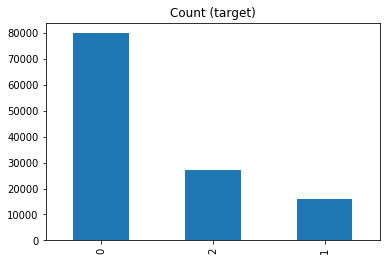

In [23]:
import matplotlib.pyplot as plot
df_train_over = pd.concat([df_class_1_over,df_class_2_over,df_class_3_over], axis=0)
print('Random over-sampling:')
print(df_train_over["CERT_CL"].value_counts())
df_train_over.columns
df_train_over["CERT_CL"].value_counts().plot(kind='bar', title='Count (target)');

Deriving the X and Y dataframes from train, test and validation datasets

In [105]:
trainx1_strat = df_train_over.drop(columns = ["CERT_CL","Duration"])
trainy1_strat = df_train_over["CERT_CL"]
#trainy1_strat = trainy1_strat.astype(float)
testx1_strat = test_strat.drop(columns = ["CERT_CL","Duration"])
testy1_strat = test_strat["CERT_CL"]

In [106]:
val_x = val.drop(columns=["CERT_CL","Duration"])
val_y = val["CERT_CL"]

Classification with Logistic Regression Model

In [108]:
from sklearn.linear_model import LogisticRegression
#logmodel_strat = LogisticRegression(random_state=0,C=1.0,max_iter=50,penalty='l2',tol=0.0001)
logmodel_strat = LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_Strat=logmodel_strat.fit(trainx1_strat,trainy1_strat)
#print(logmodel_strat.fit(trainx1_strat,trainy1_strat))
print(logmodel_strat.intercept_)
#y = mx 
print(logmodel_strat.fit(trainx1_strat,trainy1_strat))
predictions = logmodel_strat.predict(trainx1_strat)
#print(predictions)
predictions1 = logmodel_strat.predict(testx1_strat)
#print(predictions1)
predictions_val = logmodel_strat.predict(val_x)
print("Intercepts:\n",Model_Strat.intercept_,"\n")
print("Coefficients\n:",Model_Strat.coef_,"\n")
print("Probabilities:\n",Model_Strat.predict_proba(testx1_strat))



[ 0.9531945  -0.25353255 -0.69966194]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Intercepts:
 [ 0.9531945  -0.25353255 -0.69966194] 

Coefficients
: [[ 1.76052587e-01  9.29908401e-02  3.12949703e-01  9.30745186e-02
  -4.49943723e-02 -1.31264915e-01 -7.14851989e-02 -2.30439390e-04
   1.49419918e+00 -8.54564516e-03  8.74423459e-04 -8.77596209e-01
  -1.28369625e-04 -1.33995934e-02  4.44403574e-03  3.20246952e-02
  -1.25814898e-01  7.75457019e-01 -6.38703781e-01 -6.21930300e-01
  -6.15622582e-01 -1.63396342e-02 -1.03066647e-01 -2.69634673e-01]
 [ 1.06213144e+00 -1.11477221e-01 -1.80896883e-01 -3.01610770e-02
   6.36612300e-02 -2.31131457e-02  2.34941308e-02  1.81205690e-03
  -2.48838512e+00 -3.5806905

Logistic Regression with Cross Validation

In [109]:

#Logistic Regression Model with CV:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

Model_CV=LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_CV_strat = Model_CV.fit(trainx1_strat,trainy1_strat)
print(Model_CV.fit(trainx1_strat,trainy1_strat))
#print(Model_Strat.intercept_)
#print(Model_Strat.coef_)
pred_train = Model_CV.predict(trainx1_strat)
print(pred_train)
pred_test= Model_CV.predict(testx1_strat)
print(pred_test)
pred_val = Model_CV.predict(val_x)
Val_pred = Model_CV.predict(val_x)
print("Intercepts:\n",Model_CV_strat.intercept_,"\n")
print("Coefficients\n:",Model_CV_strat.coef_,"\n")
print("Probabilities:\n",Model_CV_strat.predict_proba(trainx1_strat))
print("Probabilities:\n",Model_CV_strat.predict_proba(testx1_strat))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 ... 2 1 2]
[0 2 0 ... 0 0 2]
Intercepts:
 [ 0.9531945  -0.25353255 -0.69966194] 

Coefficients
: [[ 1.76052587e-01  9.29908401e-02  3.12949703e-01  9.30745186e-02
  -4.49943723e-02 -1.31264915e-01 -7.14851989e-02 -2.30439390e-04
   1.49419918e+00 -8.54564516e-03  8.74423459e-04 -8.77596209e-01
  -1.28369625e-04 -1.33995934e-02  4.44403574e-03  3.20246952e-02
  -1.25814898e-01  7.75457019e-01 -6.38703781e-01 -6.21930300e-01
  -6.15622582e-01 -1.63396342e-02 -1.03066647e-01 -2.69634673e-01]
 [ 1.06213144e+00 -1.11477221e-01 -1.80896883e-01 -3.01610770e-02
   6.36612300e-02 -2.31131457e-02  2.34941308e-02  1.81205690e-03
  -2.48838512e+00 -3.58069059e

Printing the Classification Report of the Logistic Regression Results

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.datasets import make_classification

In [110]:
print(classification_report(trainy1_strat,predictions))
print(classification_report(testy1_strat,predictions1))
print(classification_report(val_y,predictions_val))
print(classification_report(trainy1_strat,pred_train))
print(classification_report(testy1_strat,pred_test))
#print(classification_report(trainy1_strat,pred_train))
print(classification_report(val_y,pred_val))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     79856
           1       0.59      0.48      0.53     16140
           2       0.72      0.67      0.69     26986

    accuracy                           0.80    122982
   macro avg       0.72      0.68      0.70    122982
weighted avg       0.79      0.80      0.79    122982

              precision    recall  f1-score   support

           0       0.59      0.90      0.71      3336
           1       0.73      0.46      0.57      2727
           2       0.83      0.69      0.75      4452

    accuracy                           0.70     10515
   macro avg       0.72      0.68      0.68     10515
weighted avg       0.73      0.70      0.69     10515

              precision    recall  f1-score   support

           0       0.59      0.90      0.71      3318
           1       0.72      0.47      0.57      2653
           2       0.83      0.68      0.75      4544

    accuracy        

In [111]:
#Feature Engineering extra tree classifer - feATURE elimination

Feature Ranking:
1. feature 6 (0.112609)
2. feature 17 (0.088833)
3. feature 1 (0.076982)
4. feature 16 (0.072746)
5. feature 18 (0.066125)
6. feature 19 (0.064908)
7. feature 8 (0.054844)
8. feature 22 (0.053782)
9. feature 20 (0.042169)
10. feature 0 (0.040760)
11. feature 7 (0.039975)
12. feature 12 (0.038907)
13. feature 23 (0.036435)
14. feature 14 (0.030889)
15. feature 11 (0.026631)
16. feature 21 (0.023568)
17. feature 13 (0.022108)
18. feature 10 (0.019040)
19. feature 15 (0.018189)
20. feature 3 (0.016625)
21. feature 4 (0.016170)
22. feature 5 (0.015634)
23. feature 2 (0.014644)
24. feature 9 (0.007429)


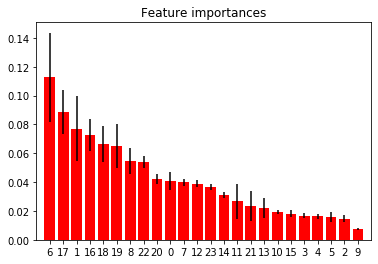

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(trainx1_strat,trainy1_strat)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature Ranking:")
for f in range(trainx1_strat.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(trainx1_strat.shape[1]),importances[indices],color="r",yerr=std[indices],align="center")
plt.xticks(range(trainx1_strat.shape[1]),indices)
plt.xlim([-1,trainx1_strat.shape[1]])
plt.show()

In [116]:
count=0
data_15feat= []
for f in range(trainx1_strat.shape[1]):
   # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    if(importances[indices[f]] < 0.026):
        print("Feature to be removed:",indices[f])
        data_15feat.append(indices[f])
        count = count + 1
    
print(data_15feat)
print("Features to be eliminated:",data_15feat)
Feature_elimination = pd.DataFrame(data_15feat)

Feature to be removed: 21
Feature to be removed: 13
Feature to be removed: 10
Feature to be removed: 15
Feature to be removed: 3
Feature to be removed: 4
Feature to be removed: 5
Feature to be removed: 2
Feature to be removed: 9
[21, 13, 10, 15, 3, 4, 5, 2, 9]
Features to be eliminated: [21, 13, 10, 15, 3, 4, 5, 2, 9]


In [117]:
count=0
data_12feat= []
for f in range(trainx1_strat.shape[1]):
   # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    if(importances[indices[f]] < 0.038):
        print("Feature to be removed:",indices[f])
        data_12feat.append(indices[f])
        count = count + 1
    
print(data_12feat)
print("Features to be eliminated:",data_12feat)
Feature_elimination = pd.DataFrame(data_12feat)

Feature to be removed: 23
Feature to be removed: 14
Feature to be removed: 11
Feature to be removed: 21
Feature to be removed: 13
Feature to be removed: 10
Feature to be removed: 15
Feature to be removed: 3
Feature to be removed: 4
Feature to be removed: 5
Feature to be removed: 2
Feature to be removed: 9
[23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]
Features to be eliminated: [23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]


In [118]:
count=0
data_10feat= []
for f in range(trainx1_strat.shape[1]):
   # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    if(importances[indices[f]] < 0.04):
        print("Feature to be removed:",indices[f])
        data_10feat.append(indices[f])
        count = count + 1
    
print(data_10feat)
print("Features to be eliminated:",data_10feat)
Feature_elimination = pd.DataFrame(data_10feat)

Feature to be removed: 7
Feature to be removed: 12
Feature to be removed: 23
Feature to be removed: 14
Feature to be removed: 11
Feature to be removed: 21
Feature to be removed: 13
Feature to be removed: 10
Feature to be removed: 15
Feature to be removed: 3
Feature to be removed: 4
Feature to be removed: 5
Feature to be removed: 2
Feature to be removed: 9
[7, 12, 23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]
Features to be eliminated: [7, 12, 23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]


In [119]:
count=0
data_5feat= []
for f in range(trainx1_strat.shape[1]):
   # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    if(importances[indices[f]] < 0.067):
        print("Feature to be removed:",indices[f])
        data_5feat.append(indices[f])
        count = count + 1
    
print(data_5feat)
print("Features to be eliminated:",data_5feat)
Feature_elimination = pd.DataFrame(data_5feat)

Feature to be removed: 18
Feature to be removed: 19
Feature to be removed: 8
Feature to be removed: 22
Feature to be removed: 20
Feature to be removed: 0
Feature to be removed: 7
Feature to be removed: 12
Feature to be removed: 23
Feature to be removed: 14
Feature to be removed: 11
Feature to be removed: 21
Feature to be removed: 13
Feature to be removed: 10
Feature to be removed: 15
Feature to be removed: 3
Feature to be removed: 4
Feature to be removed: 5
Feature to be removed: 2
Feature to be removed: 9
[18, 19, 8, 22, 20, 0, 7, 12, 23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]
Features to be eliminated: [18, 19, 8, 22, 20, 0, 7, 12, 23, 14, 11, 21, 13, 10, 15, 3, 4, 5, 2, 9]


In [121]:
#Eliminating features with least importance
Elim_cols_15feat = []
for i in data_15feat:
    #print(trainx1_strat.columns[i])
    Elim_cols_15feat.append(trainx1_strat.columns[i])
    
print(Elim_cols_15feat)

['Continuous_years_of_membership', 'prim_top', 'visa_code', 'mpa_code', 'MEM_CODE', 'I_CLASS', 'I_SEX', 'LTL+Other Plan', 'md_do']


In [122]:
#Eliminating features with least importance
Elim_cols_12feat = []
for i in data_12feat:
    #print(trainx1_strat.columns[i])
    Elim_cols_12feat.append(trainx1_strat.columns[i])
    
print(Elim_cols_12feat)

['CMP_D', 'prim_pe', 'Current Member status', 'Continuous_years_of_membership', 'prim_top', 'visa_code', 'mpa_code', 'MEM_CODE', 'I_CLASS', 'I_SEX', 'LTL+Other Plan', 'md_do']


In [123]:
#Eliminating features with least importance
Elim_cols_10feat = []
for i in data_10feat:
    #print(trainx1_strat.columns[i])
    Elim_cols_10feat.append(trainx1_strat.columns[i])
    
print(Elim_cols_10feat)

['ISSU_STATE', 'prim_spec', 'CMP_D', 'prim_pe', 'Current Member status', 'Continuous_years_of_membership', 'prim_top', 'visa_code', 'mpa_code', 'MEM_CODE', 'I_CLASS', 'I_SEX', 'LTL+Other Plan', 'md_do']


In [126]:
F_E_15fea =trainx1_strat.drop(columns = Elim_cols_15feat,axis=1)
F_E_1_15fea = testx1_strat.drop(columns = Elim_cols_15feat,axis=1)

In [127]:
F_E_12fea =trainx1_strat.drop(columns = Elim_cols_12feat,axis=1)
F_E_1_12fea = testx1_strat.drop(columns = Elim_cols_12feat,axis=1)

In [128]:
F_E_10fea =trainx1_strat.drop(columns = Elim_cols_10feat,axis=1)
F_E_1_10fea = testx1_strat.drop(columns = Elim_cols_10feat,axis=1)

In [170]:
F_E_12fea.head()
F_E_1_10fea.head()
F_E_12fea.shape

(122982, 12)

In [172]:
VAL_15fea =val_x.drop(columns = Elim_cols_15feat,axis=1)
VAL_15fea.shape

(10515, 15)

In [173]:
VAL_12fea =val_x.drop(columns = Elim_cols_12feat,axis=1)
VAL_12fea.shape

(10515, 12)

In [174]:
VAL_10fea =val_x.drop(columns = Elim_cols_10feat,axis=1)
VAL_10fea.shape

(10515, 10)

In [175]:
print("Top 10 Features Identified:",F_E_10fea.columns)
print("Top 12 Features Identified:",F_E_12fea.columns)
print("Top 15 Features Identified:",F_E_15fea.columns)

Top 10 Features Identified: Index(['.of Mails', 'Term', 'MODE', 'RISK_CLASS', 'ANNZD_PREM', 'I_CURR_AGE',
       'I_AGE_ISSU', 'yrs_pract', 'Total_years_of_membership', 'EFF_D'],
      dtype='object')
Top 12 Features Identified: Index(['.of Mails', 'Term', 'MODE', 'ISSU_STATE', 'RISK_CLASS', 'prim_spec',
       'ANNZD_PREM', 'I_CURR_AGE', 'I_AGE_ISSU', 'yrs_pract',
       'Total_years_of_membership', 'EFF_D'],
      dtype='object')
Top 15 Features Identified: Index(['.of Mails', 'Term', 'MODE', 'ISSU_STATE', 'RISK_CLASS',
       'Current Member status', 'prim_spec', 'prim_pe', 'ANNZD_PREM',
       'I_CURR_AGE', 'I_AGE_ISSU', 'yrs_pract', 'Total_years_of_membership',
       'EFF_D', 'CMP_D'],
      dtype='object')


In [147]:
######Logistic regression with 10 features

In [148]:
from sklearn.linear_model import LogisticRegression
logmodel_strat1 = LogisticRegression(random_state=0,C=1.0,max_iter=50,penalty='l2')
Model_Strat=logmodel_strat.fit(F_E_10fea,trainy1_strat)
#print(logmodel_strat.fit(trainx1_strat,trainy1_strat))
print(logmodel_strat.intercept_)
#y = mx 
print(logmodel_strat1.fit(F_E_10fea,trainy1_strat))
print(Model_Strat.intercept_)
print(Model_Strat.coef_)
pred_train_10fea = logmodel_strat1.predict(F_E_10fea)
print(pred_train_10fea)
pred_test_10fea = logmodel_strat1.predict(F_E_1_10fea)
print(pred_test_10fea)
Val_pred_10fea = logmodel_strat1.predict(VAL_10fea)

[-0.35417782  0.89406235 -0.53988454]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
[-0.35417782  0.89406235 -0.53988454]
[[ 0.19650836  0.11768724 -0.07450235  1.55701486 -0.12304729  0.68013807
  -0.61386304  0.02149233  0.12881637 -0.22267498]
 [ 1.01102525 -0.12865749  0.02599307 -2.52718978  0.11478359  0.46590793
  -0.56360136 -0.09298033  0.03085939  0.05734229]
 [-1.20753361  0.01097025  0.04850928  0.97017492  0.0082637  -1.146046
   1.17746441  0.071488   -0.15967576  0.16533269]]
[0 0 0 ... 2 0 2]
[0 2 0 ... 0 0 2]


In [149]:
#predictions3 = forest.predict(F_E,testy1_strat)from sklearn.metrics import cl
print(classification_report(trainy1_strat,pred_train_10fea))
print(classification_report(testy1_strat,pred_test_10fea))
print(classification_report(val_y,Val_pred_10fea))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     79856
           1       0.55      0.33      0.42     16140
           2       0.72      0.67      0.69     26986

    accuracy                           0.78    122982
   macro avg       0.70      0.64      0.66    122982
weighted avg       0.77      0.78      0.77    122982

              precision    recall  f1-score   support

           0       0.54      0.90      0.68      3336
           1       0.71      0.33      0.45      2727
           2       0.83      0.69      0.75      4452

    accuracy                           0.66     10515
   macro avg       0.69      0.64      0.63     10515
weighted avg       0.71      0.66      0.65     10515

              precision    recall  f1-score   support

           0       0.54      0.90      0.67      3318
           1       0.70      0.33      0.45      2653
           2       0.83      0.67      0.74      4544

    accuracy        

Logistic Regression with 10features with cross validation

In [150]:
#Logistic Regression Model with CV:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
Model_CV=LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_CV_strat = Model_CV.fit(F_E_10fea,trainy1_strat)
print(Model_CV.fit(F_E_10fea,trainy1_strat))
#print(Model_Strat.intercept_)
#print(Model_Strat.coef_)
pred_train_10feacv = Model_CV.predict(F_E_10fea)
print(pred_train_10feacv)
pred_test_10feacv = Model_CV.predict(F_E_1_10fea)
print(pred_test_10feacv)
Val_pred_10feacv = Model_CV.predict(VAL_10fea)
print("Intercepts:\n",Model_CV_strat.intercept_,"\n")
print("Coefficients\n:",Model_CV_strat.coef_,"\n")
print("Probabilities:\n",Model_CV_strat.predict_proba(F_E_1_10fea))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 ... 2 0 2]
[0 2 0 ... 0 0 2]
Intercepts:
 [-0.35417782  0.89406235 -0.53988454] 

Coefficients
: [[ 0.19650836  0.11768724 -0.07450235  1.55701486 -0.12304729  0.68013807
  -0.61386304  0.02149233  0.12881637 -0.22267498]
 [ 1.01102525 -0.12865749  0.02599307 -2.52718978  0.11478359  0.46590793
  -0.56360136 -0.09298033  0.03085939  0.05734229]
 [-1.20753361  0.01097025  0.04850928  0.97017492  0.0082637  -1.146046
   1.17746441  0.071488   -0.15967576  0.16533269]] 

Probabilities:
 [[8.19837507e-01 1.59192629e-01 2.09698644e-02]
 [3.23119074e-01 3.83930826e-02 6.38487844e-01]
 [7.95949234e-01 7.92255806e-03 1.96128208e-01]
 ...
 [6.65307478e-01 1

In [151]:
print(classification_report(trainy1_strat,pred_train_10feacv))
print(classification_report(testy1_strat,pred_test_10feacv))
print(classification_report(val_y,Val_pred_10feacv))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     79856
           1       0.54      0.42      0.47     16140
           2       0.72      0.68      0.70     26986

    accuracy                           0.78    122982
   macro avg       0.70      0.66      0.68    122982
weighted avg       0.77      0.78      0.78    122982

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3336
           1       0.71      0.41      0.52      2727
           2       0.83      0.69      0.76      4452

    accuracy                           0.68     10515
   macro avg       0.70      0.66      0.65     10515
weighted avg       0.72      0.68      0.67     10515

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3318
           1       0.71      0.42      0.53      2653
           2       0.84      0.68      0.75      4544

    accuracy        

Logistic regression with 12 features

In [152]:
from sklearn.linear_model import LogisticRegression
logmodel_strat1 = LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_Strat=logmodel_strat1.fit(F_E_12fea,trainy1_strat)
#print(logmodel_strat.fit(trainx1_strat,trainy1_strat))
#print(logmodel_strat1.intercept_)
#y = mx 
print(logmodel_strat1.fit(F_E_12fea,trainy1_strat))
#print(Model_Strat.intercept_)
#print(Model_Strat.coef_)
pred_train_12fea = logmodel_strat1.predict(F_E_12fea)
print(pred_train_12fea)
pred_test_12fea = logmodel_strat1.predict(F_E_1_12fea)
print(pred_test_12fea)
Val_pred_12fea = logmodel_strat1.predict(VAL_12fea)
print("Intercepts:\n",Model_Strat.intercept_,"\n")
print("Coefficients\n:",Model_Strat.coef_,"\n")
print("Probabilities:\n",Model_Strat.predict_proba(F_E_1_12fea))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 ... 2 0 2]
[0 2 0 ... 0 0 2]
Intercepts:
 [-0.31007558  0.79133505 -0.48125946] 

Coefficients
: [[ 1.95143273e-01  1.17527322e-01 -7.45161361e-02 -6.00006158e-04
   1.55783020e+00 -2.64003057e-04 -1.23283426e-01  6.80188250e-01
  -6.13746742e-01  1.71807944e-02  1.30353065e-01 -2.20699638e-01]
 [ 1.01471951e+00 -1.28304532e-01  2.60834121e-02  1.89394464e-03
  -2.52925306e+00  4.92002097e-04  1.15603620e-01  4.65977809e-01
  -5.63908837e-01 -8.46970467e-02  2.67127331e-02  5.33554390e-02]
 [-1.20986279e+00  1.07772100e-02  4.84327240e-02 -1.29393839e-03
   9.71422864e-01 -2.27999473e-04  7.67980610e-03 -1.14616606e+00
   1.17765558e+00  6.75162523

With cross validation

In [153]:
#Logistic Regression Model with CV:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
Model_CV=LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_CV_strat = Model_CV.fit(F_E_12fea,trainy1_strat)
print(Model_CV.fit(F_E_12fea,trainy1_strat))
#print(Model_Strat.intercept_)
#print(Model_Strat.coef_)
pred_train_12feacv = Model_CV_strat.predict(F_E_12fea)
print(pred_train_12fea)
pred_test_12feacv = Model_CV_strat.predict(F_E_1_12fea)
print(pred_test_12fea)

Val_pred_12feacv= Model_CV_strat.predict(VAL_12fea)
print(Val_pred_12feacv.shape)
#data=[]
#Val_pred_12feacv=pd.DataFrame(data)
#data.to_csv("ValidationPredictions.csv")
print("Intercepts:\n",Model_CV_strat.intercept_,"\n")
print("Coefficients\n:",Model_CV_strat.coef_,"\n")
print("Probabilities:\n",Model_CV_strat.predict_proba(F_E_1_12fea))
Val_prob_12fea = Model_CV_strat.predict_proba(VAL_12fea)
test_prob_12fea=Model_CV_strat.predict_proba(F_E_1_12fea)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 ... 2 0 2]
[0 2 0 ... 0 0 2]
(10515,)
Intercepts:
 [-0.31007558  0.79133505 -0.48125946] 

Coefficients
: [[ 1.95143273e-01  1.17527322e-01 -7.45161361e-02 -6.00006158e-04
   1.55783020e+00 -2.64003057e-04 -1.23283426e-01  6.80188250e-01
  -6.13746742e-01  1.71807944e-02  1.30353065e-01 -2.20699638e-01]
 [ 1.01471951e+00 -1.28304532e-01  2.60834121e-02  1.89394464e-03
  -2.52925306e+00  4.92002097e-04  1.15603620e-01  4.65977809e-01
  -5.63908837e-01 -8.46970467e-02  2.67127331e-02  5.33554390e-02]
 [-1.20986279e+00  1.07772100e-02  4.84327240e-02 -1.29393839e-03
   9.71422864e-01 -2.27999473e-04  7.67980610e-03 -1.14616606e+00
   1.17765558e+00  6

In [154]:
Model_CV_strat.intercept_
Model_CV_strat.classes_
Model_CV_strat.coef_

array([[ 1.95143273e-01,  1.17527322e-01, -7.45161361e-02,
        -6.00006158e-04,  1.55783020e+00, -2.64003057e-04,
        -1.23283426e-01,  6.80188250e-01, -6.13746742e-01,
         1.71807944e-02,  1.30353065e-01, -2.20699638e-01],
       [ 1.01471951e+00, -1.28304532e-01,  2.60834121e-02,
         1.89394464e-03, -2.52925306e+00,  4.92002097e-04,
         1.15603620e-01,  4.65977809e-01, -5.63908837e-01,
        -8.46970467e-02,  2.67127331e-02,  5.33554390e-02],
       [-1.20986279e+00,  1.07772100e-02,  4.84327240e-02,
        -1.29393839e-03,  9.71422864e-01, -2.27999473e-04,
         7.67980610e-03, -1.14616606e+00,  1.17765558e+00,
         6.75162523e-02, -1.57065798e-01,  1.67344199e-01]])

In [158]:
#predictions3 = forest.predict(F_E,testy1_strat)from sklearn.metrics import classification_report
#predictions = forest.predict(F_E)
#predictions1 = forest.predict(F_E_1)
print(classification_report(trainy1_strat,pred_train_12fea))
print(classification_report(testy1_strat,pred_test_12fea))
print(classification_report(val_y,Val_pred_12fea))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     79856
           1       0.54      0.42      0.47     16140
           2       0.72      0.68      0.70     26986

    accuracy                           0.78    122982
   macro avg       0.70      0.66      0.68    122982
weighted avg       0.77      0.78      0.78    122982

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3336
           1       0.71      0.40      0.51      2727
           2       0.83      0.69      0.76      4452

    accuracy                           0.68     10515
   macro avg       0.70      0.66      0.65     10515
weighted avg       0.72      0.68      0.67     10515

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3318
           1       0.71      0.42      0.53      2653
           2       0.84      0.68      0.75      4544

    accuracy        

In [159]:
#predictions3 = forest.predict(F_E,testy1_strat)from sklearn.metrics import classification_report
#predictions = forest.predict(F_E)
#predictions1 = forest.predict(F_E_1)
print(classification_report(trainy1_strat,pred_train_12feacv))
print(classification_report(testy1_strat,pred_test_12feacv))
print(classification_report(val_y,Val_pred_12feacv))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     79856
           1       0.54      0.42      0.47     16140
           2       0.72      0.68      0.70     26986

    accuracy                           0.78    122982
   macro avg       0.70      0.66      0.68    122982
weighted avg       0.77      0.78      0.78    122982

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3336
           1       0.71      0.40      0.51      2727
           2       0.83      0.69      0.76      4452

    accuracy                           0.68     10515
   macro avg       0.70      0.66      0.65     10515
weighted avg       0.72      0.68      0.67     10515

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3318
           1       0.71      0.42      0.53      2653
           2       0.84      0.68      0.75      4544

    accuracy        

LR with 15 features

In [160]:
from sklearn.linear_model import LogisticRegression
logmodel_strat1 = LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_Strat=logmodel_strat.fit(F_E_15fea,trainy1_strat)
#print(logmodel_strat.fit(trainx1_strat,trainy1_strat))
print(logmodel_strat.intercept_)
#y = mx 
print(logmodel_strat1.fit(F_E_15fea,trainy1_strat))
print(Model_Strat.intercept_)
print(Model_Strat.coef_)
pred_train_15fea = logmodel_strat1.predict(F_E_15fea)
print(pred_train_15fea)
pred_test_15fea = logmodel_strat1.predict(F_E_1_15fea)
print(pred_test_15fea)
Val_pred_15fea = logmodel_strat1.predict(VAL_15fea)

[ 0.62823482  0.19460437 -0.8228392 ]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[ 0.62823482  0.19460437 -0.8228392 ]
[[ 1.58215478e-01  1.02926833e-01 -7.33337159e-02 -2.07370642e-04
   1.53576005e+00 -9.71909627e-01 -6.87251167e-05  1.64809311e-03
  -1.30990138e-01  7.35587172e-01 -6.43806304e-01  1.76396436e-01
  -8.05704596e-01 -1.53286777e-01 -2.69471797e-01]
 [ 1.03687709e+00 -1.17688111e-01  2.50354984e-02  1.58222154e-03
  -2.54402449e+00  5.12785351e-01  3.53578633e-04 -7.86622917e-04
   1.18723575e-01  4.29144255e-01 -5.33556042e-01 -1.18246186e-01
   5.07696807e-01  2.27264358e-02  2.12703500e-01]
 [-1.19509256e+00  1.47612786e-02  4.82982175e-02 -1.37485086e-03
   1.00826444e+00  4.59

In [161]:
#predictions3 = forest.predict(F_E,testy1_strat)from sklearn.metrics import classification_report
#predictions = forest.predict(F_E)
#predictions1 = forest.predict(F_E_1)
print(classification_report(trainy1_strat,pred_train_15fea))
print(classification_report(testy1_strat,pred_test_15fea))
print(classification_report(val_y,Val_pred_15fea))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87     79856
           1       0.58      0.46      0.51     16140
           2       0.73      0.67      0.70     26986

    accuracy                           0.79    122982
   macro avg       0.72      0.68      0.70    122982
weighted avg       0.79      0.79      0.79    122982

              precision    recall  f1-score   support

           0       0.58      0.90      0.71      3336
           1       0.73      0.45      0.56      2727
           2       0.83      0.68      0.75      4452

    accuracy                           0.69     10515
   macro avg       0.71      0.68      0.67     10515
weighted avg       0.72      0.69      0.69     10515

              precision    recall  f1-score   support

           0       0.58      0.90      0.71      3318
           1       0.72      0.46      0.56      2653
           2       0.84      0.68      0.75      4544

    accuracy        

with cross validation

In [162]:
#Logistic Regression Model with CV:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
Model_CV=LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
Model_CV_strat = Model_CV.fit(F_E_15fea,trainy1_strat)
print(Model_CV.fit(F_E_15fea,trainy1_strat))
#print(Model_Strat.intercept_)
#print(Model_Strat.coef_)
pred_train_15feacv = Model_CV.predict(F_E_15fea)
print(pred_train_15fea)
pred_test_15feacv = Model_CV.predict(F_E_1_15fea)
print(pred_test_15fea)
Val_pred_15feacv = Model_CV.predict(VAL_15fea)
print("Intercepts:\n",Model_CV_strat.intercept_,"\n")
print("Coefficients\n:",Model_CV_strat.coef_,"\n")
intercepts_15fea = Model_CV_strat.intercept_
Coefficients_15fea = Model_CV_strat.coef_
print("Probabilities:\n",Model_CV_strat.predict_proba(F_E_1_15fea))
print("Probabilities of validation set:\n",Model_CV_strat.predict_proba(VAL_15fea))
Val_prob_15fea = Model_CV_strat.predict_proba(VAL_15fea)
prob_val_15=Model_CV_strat.predict_proba(VAL_15fea)
test_prob_15fea=Model_CV_strat.predict_proba(F_E_1_15fea)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 ... 2 1 2]
[0 2 0 ... 0 0 2]
Intercepts:
 [ 0.62823482  0.19460437 -0.8228392 ] 

Coefficients
: [[ 1.58215478e-01  1.02926833e-01 -7.33337159e-02 -2.07370642e-04
   1.53576005e+00 -9.71909627e-01 -6.87251167e-05  1.64809311e-03
  -1.30990138e-01  7.35587172e-01 -6.43806304e-01  1.76396436e-01
  -8.05704596e-01 -1.53286777e-01 -2.69471797e-01]
 [ 1.03687709e+00 -1.17688111e-01  2.50354984e-02  1.58222154e-03
  -2.54402449e+00  5.12785351e-01  3.53578633e-04 -7.86622917e-04
   1.18723575e-01  4.29144255e-01 -5.33556042e-01 -1.18246186e-01
   5.07696807e-01  2.27264358e-02  2.12703500e-01]
 [-1.19509256e+00  1.47612786e-02  4.82982175e-02 -1.37485086

In [163]:
#Logistic Regression Model with CV:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
Model_CV=LogisticRegression(penalty="l2",tol=0.0001,C=1.0,fit_intercept=True,solver="newton-cg",max_iter=100,multi_class="multinomial")
F_E_15fea1= F_E_15fea.drop(columns=["RISK_CLASS","prim_spec"])
Model_CV_strat = Model_CV.fit(F_E_15fea1,trainy1_strat)
print(Model_CV.fit(F_E_15fea1,trainy1_strat))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [164]:
#F_E_1_15fea1=F_E_15fea1.drop(columns=["RISK_CLASS","prim_spec"])
print(classification_report(trainy1_strat,Model_CV_strat.predict(F_E_15fea1)))
#print(classification_report(testy1_strat,Model_CV_strat.predict(F_E_15fea1)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     79856
           1       0.56      0.37      0.45     16140
           2       0.70      0.64      0.67     26986

    accuracy                           0.77    122982
   macro avg       0.69      0.64      0.66    122982
weighted avg       0.76      0.77      0.76    122982



In [165]:
df_intercepts_15 = pd.DataFrame(intercepts_15fea)
df_Coefficients_15 = pd.DataFrame(Coefficients_15fea)
df_intercepts_15.to_csv(r"\\iafs1\data\sa\consultants\Customers File\intercepts_15.csv")
df_Coefficients_15.to_csv(r"\\iafs1\data\sa\consultants\Customers File\Coefficients_15.csv")

In [166]:
df_val_actux = pd.DataFrame(VAL_15fea)
df_val_actux.to_csv(r"\\iafs1\data\sa\consultants\Customers File\Validation15actux.csv")
df_val_pred = pd.DataFrame(Val_pred_15feacv)
df_val_actu = pd.DataFrame(val_y)
df_val_prob = pd.DataFrame(prob_val_15)
df_val_pred.to_csv(r"\\iafs1\data\sa\consultants\Customers File\valPred15.csv")
df_val_actu.to_csv(r"\\iafs1\data\sa\consultants\Customers File\valactu15.csv")
df_val_prob.to_csv(r"\\iafs1\data\sa\consultants\Customers File\valprob15.csv")

In [167]:
#predictions3 = forest.predict(F_E,testy1_strat)from sklearn.metrics import classification_report
#predictions = forest.predict(F_E)
#predictions1 = forest.predict(F_E_1)
print(classification_report(trainy1_strat,pred_train_15feacv))
print(classification_report(testy1_strat,pred_test_15feacv))
print(classification_report(val_y,Val_pred_15feacv))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87     79856
           1       0.58      0.46      0.51     16140
           2       0.73      0.67      0.70     26986

    accuracy                           0.79    122982
   macro avg       0.72      0.68      0.70    122982
weighted avg       0.79      0.79      0.79    122982

              precision    recall  f1-score   support

           0       0.58      0.90      0.71      3336
           1       0.73      0.45      0.56      2727
           2       0.83      0.68      0.75      4452

    accuracy                           0.69     10515
   macro avg       0.71      0.68      0.67     10515
weighted avg       0.72      0.69      0.69     10515

              precision    recall  f1-score   support

           0       0.58      0.90      0.71      3318
           1       0.72      0.46      0.56      2653
           2       0.84      0.68      0.75      4544

    accuracy        